Following points are covered in this tutorial 
1. How to load data using fastai
2. Explore the data 
3. Create a dataloader

In [134]:
from fastai.vision.all import *

# Example1: Image regression. 

Given a image, we have to find the output in the form of numbers. 
For this example, we have 

<strong>Input</strong>: Image of plant root, \
<strong>Output</strong>: \
        1. total root length \
        2. the number of branches of the root \
        3. depth of root

In [75]:
# Get data from https://data-challenges.fz-juelich.de/web/challenges/challenge-page/85/overview

df = pd.read_csv("root/train.csv" )
df.head()

,image,tot_root_length,n_laterals,depth
0,monocot-sim-30-10-25.rsml.jpg,2375.78270,124,164.93068
1,monocot-sim-348-4-18.rsml.jpg,10114.11100,496,189.99200
2,dicot-sim-407-1-21.rsml.jpg,8269.03400,475,189.90733
3,monocot-sim-427-10-15.rsml.jpg,9242.80500,516,204.97801
4,dicot-sim-6-10-25.rsml.jpg,403.78925,25,104.98667


In [61]:
df_stat = df.describe()
df_stat["tot_root_length"] , df_stat["tot_root_length"]["mean"]

(count     8371.000000
 mean      6258.159151
 std       8740.875921
 min         78.713036
 25%        931.466970
 50%       2631.605200
 75%       7974.766350
 max      73971.210000
 Name: tot_root_length, dtype: float64,
 6258.159150717596)

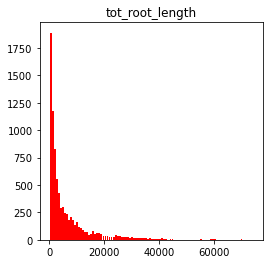

In [62]:
ax = df.hist(column='tot_root_length', bins=100, grid=False, figsize=(4,4), color='red', zorder=2, rwidth=0.9)
# ax[0][0].set_xlim((0, 500))

In [63]:
path = Path("root")
img_path = path/"images"
print(f"Total number of images are  {len(img_path.ls())}")

Total number of images are  10464


In [64]:
img_files = path/"images"/df["image"]
img_files[0]

Path('root/images/monocot-sim-30-10-25.rsml.jpg')

id : 1500, image shape  (3288, 515)
data : image              dicot-sim-494-10-25.rsml.jpg
tot_root_length                       1615.5778
n_laterals                                   94
depth                                 229.95468
Name: 1500, dtype: object


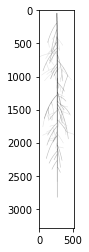

In [65]:
for i in range(1):
    ix = random.randint(0,len(img_files)-1)
#     ix = 4741
    image = Image.open(img_files[ix])
    plt.figure(figsize=(4,4))
    plt.imshow(image , cmap="gray") 
    img_data = df.loc[ix]
    print (f"id : {ix}, image shape  {image.shape}")
    print (f"data : {img_data}")

In [66]:
def get_x(r): 
#     print(r)
    image = Image.open(path/"images"/r['image'], mode="r")
    image = image.convert('RGB')
    image = image.resize((256,256))
    return tensor(image)


max_rlen = df_stat["tot_root_length"]["max"]
min_rlen = df_stat["tot_root_length"]["min"]

max_literal = df_stat["n_laterals"]["max"]
min_literal = df_stat["n_laterals"]["min"]

max_depth = df_stat["depth"]["max"]
min_depth = df_stat["depth"]["min"]

# def get_y(r): return (r['tot_root_length']-df_stat["tot_root_length"]["mean"])/df_stat["tot_root_length"]["std"]
def get_y(r): return ([(r['tot_root_length']-min_rlen)/(max_rlen-min_rlen), 
                      (r['n_laterals']-min_literal)/(max_literal-min_literal),
                      (r['depth']-min_depth)/(max_depth-min_depth) ]  )



dblock = DataBlock((ImageBlock, RegressionBlock), 
                   get_x = get_x, # get input 
                   get_y = get_y, # get output 
                    batch_tfms=[Normalize.from_stats(*imagenet_stats)],)

In [67]:
dls = dblock.dataloaders(df, bs=1)

In [68]:
x,y = dls.one_batch()
x.shape , y.shape

(torch.Size([1, 3, 256, 256]), torch.Size([1, 3]))

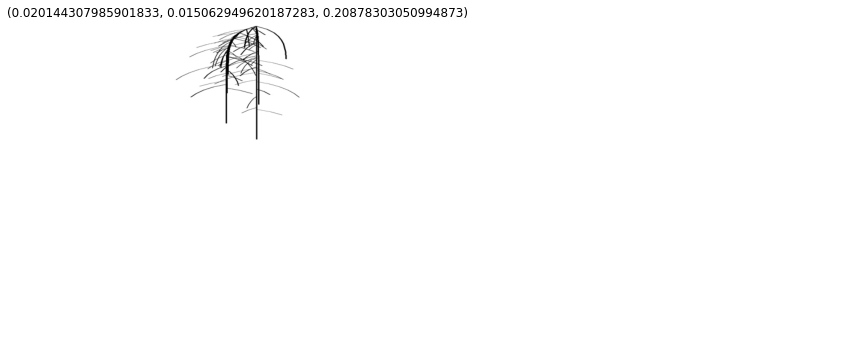

In [69]:
dls.show_batch(nrows=2, ncols=4)

# Example2: Image classification.  

In [86]:
path = untar_data(URLs.FLOWERS)
print(f"url to dowload the flower dataset {URLs.FLOWERS}")

url to dowload the flower dataset https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz


In [82]:
img_path = path/"jpg" # directory of images 
labels = path/"train.txt" # labels for each image

In [85]:
img_path.ls()

(#8189) [Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_01127.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_04679.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_01680.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_05039.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_00767.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_03672.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_02032.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_02795.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_00306.jpg'),Path('/home/k.govind/.fastai/data/oxford-102-flowers/jpg/image_05458.jpg')...]

In [91]:
df = pd.read_csv(labels,names=["img","label"],sep=" ")
df.head()

,img,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [115]:
np.unique(df["label"],return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 

In [97]:
def get_x(r): 
#     print(r)
    image = Image.open(path/r['img'], mode="r")
    image = image.convert('RGB')
    image = image.resize((256,256))
    return tensor(image)


def get_y(r): return r['label']



dblock = DataBlock((ImageBlock, CategoryBlock), 
                   get_x = get_x, # get input 
                   get_y = get_y, # get output 
                    batch_tfms=[Normalize.from_stats(*imagenet_stats)],)

In [124]:
dls = dblock.dataloaders(df, bs=16)

In [125]:
x,y = dls.one_batch()
x.shape , y.shape

(torch.Size([16, 3, 256, 256]), torch.Size([16]))

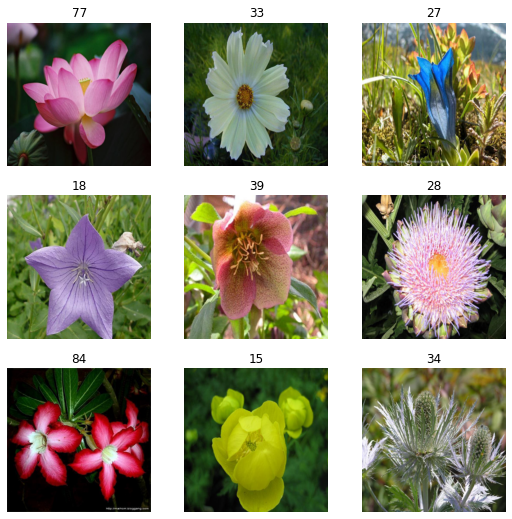

In [127]:
dls.show_batch()

In [133]:
# dir(dls)

Sources: 
    
1 https://github.com/fastai/fastai/blob/master/dev_nbs/course/